In [1]:
import numpy as np
import pandas as pd

In [2]:
netflix_df = pd.read_csv("data.csv")
netflix_df_copy = netflix_df

In [3]:
netflix_df[1:10]

show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating  duration  \
1  December 23, 2016          2016  TV-MA    93 min   
2  December 20, 2018          2011      R    78 min   
3  November 16, 2017          2009  PG-13    80 min   
4    January 1, 2020          2008  PG-13   123 min   
5       July 1, 2017          2016  TV-MA  1 Season   
6       June 1, 2020          2019  TV-MA    95 min   
7   November 1, 2019          1997      R   119 min   
8      April 1, 2019          2019  TV-14   118 min   
9  December 15, 2017          2008  TV-MA   143 min   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...  
7  After one of his high school students attacks ...  
8  When a doctor goes missing, his psychiatrist w...  
9  An architect and his wife move into a castle t...

In [22]:
categories = []
for i in range(len(netflix_df)):
    categories.extend(netflix_df.listed_in.iloc[i].split(','))

for i in range(len(categories)):
    categories[i] = categories[i].strip()
    
categories_dict = {}
for i in categories:
    categories_dict[i] = categories.count(i)
    
categories_dict = dict(sorted(categories_dict.items(), key=lambda entry: entry[1], reverse=True))

In [23]:
categories

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

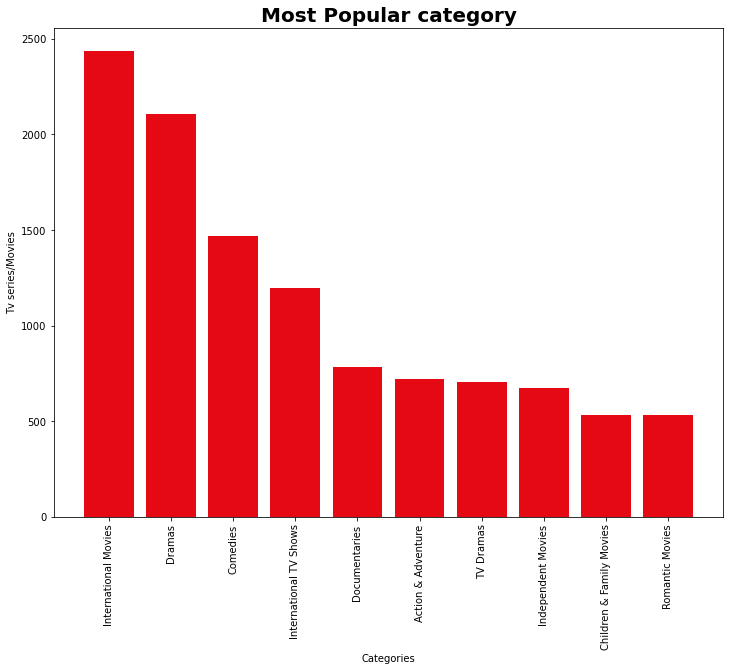

In [24]:
import matplotlib.pyplot as plt

height = list(categories_dict.values())[:10]
bars = list(categories_dict.keys())[:10]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height,color = "#E50914")
plt.xlabel('Categories') 
plt.xticks(y_pos, bars)
plt.ylabel('Tv series/Movies') 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

plt.xticks(rotation=90)

# Show graphic
plt.show()

In [25]:
import datetime

def get_month(string_time):
    try:
        clean = string_time.strip()
        parsed = datetime.datetime.strptime(clean, '%B %d, %Y')
        #print(parsed)
        return int(parsed.month)

    except Exception as e:
        return e

In [26]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [27]:
netflix_df['added_month'] = netflix_df['date_added'].apply(
    get_month)
with_year = netflix_df[netflix_df['added_month'] != 0]
#with_year = with_year.sort_values(by=['added_month'])

#with_year
#netflix_df['added_month']

[8, 12, 11, 1, 7, 6, 4, 10, 5, 3, 9, 2]
[833, 785, 757, 738, 669, 619, 618, 601, 600, 543, 542, 472]


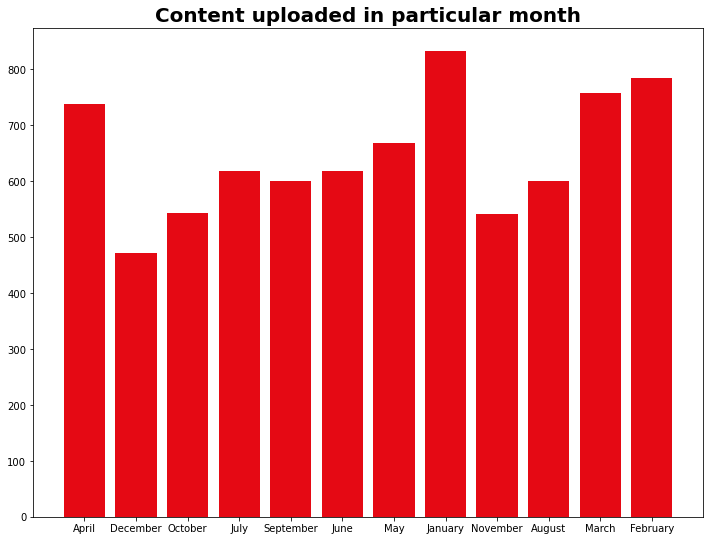

In [28]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

bars = list(with_year.added_month.unique()[:12])
height = list(with_year.added_month.value_counts()[:12])
print(bars)
print(height)

plt.bar(bars, height, color = "#E50914" )
plt.xticks(bars, ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
#plt.xticks.labels = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#bars = list()

plt.title('Content uploaded in particular month',fontsize=20, fontweight='bold') 
plt.show()

In [29]:
#netflix_df['date_added']
netflix_df['pd_date'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.sort_values(by='pd_date', inplace=True)
netflix_df.set_index(['pd_date'], inplace=True)

In [49]:
import math

month_array = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
netflix_df['date_year'] = netflix_df.index.year
netflix_df['date_month'] = netflix_df.index.month
netflix_df.dropna(subset = ["date_month"], inplace=True)
netflix_df['date_month'] = netflix_df['date_month'].apply(lambda current_data: month_array[int(current_data) - 1])
#netflix_df['one'] = 1

In [79]:
#print(netflix_df.head())

netflix_df_filtered = netflix_df[netflix_df['date_year'].between(2017, 2020)]
netflix_df_filtered = netflix_df_filtered.sort_values(by=['added_month'])

netflix_pivot = pd.pivot_table(
netflix_df_filtered,
values = 'show_id', index='date_year', columns='date_month', aggfunc='count', fill_value=0)
netflix_pivot = netflix_pivot.reindex(month_array, axis=1)
netflix_pivot = netflix_pivot.T
netflix_pivot.head()

date_year   2017  2018  2019  2020
date_month                        
January       72   130   162   228
February      84    88   159   117
March        140   175   179   152
April         95   118   171   188
May           88   101   159   173

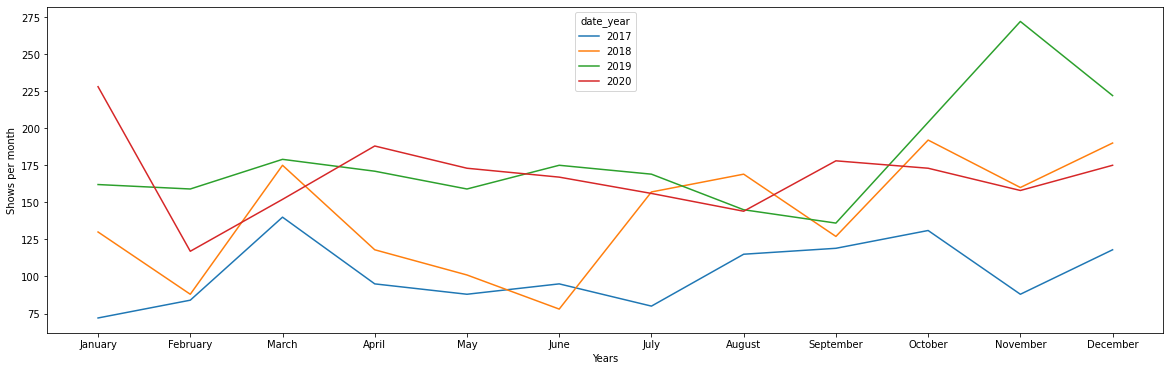

In [52]:
ax = netflix_pivot.plot(kind="line")
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

plt.xticks( np.arange(12), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Shows per month")

plt.show()

In [93]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158006 sha256=87961925fb9c0c4c72ec500cf4104529af5949008cfdcba77b1f46cb1837dfe3
  Stored in directory: /Users/divan/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [121]:
netflix_df_copy.dropna(subset = ["description"], inplace=True)
all_descriptions = " ".join(description for description in netflix_df_copy.description)
all_descriptions = all_actors.replace(',', '')

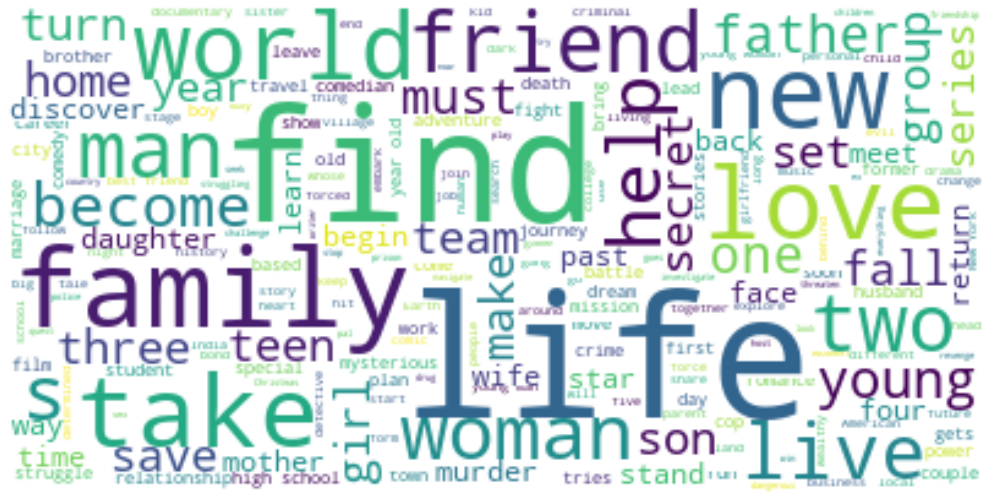

In [124]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(background_color="white").generate(all_descriptions)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

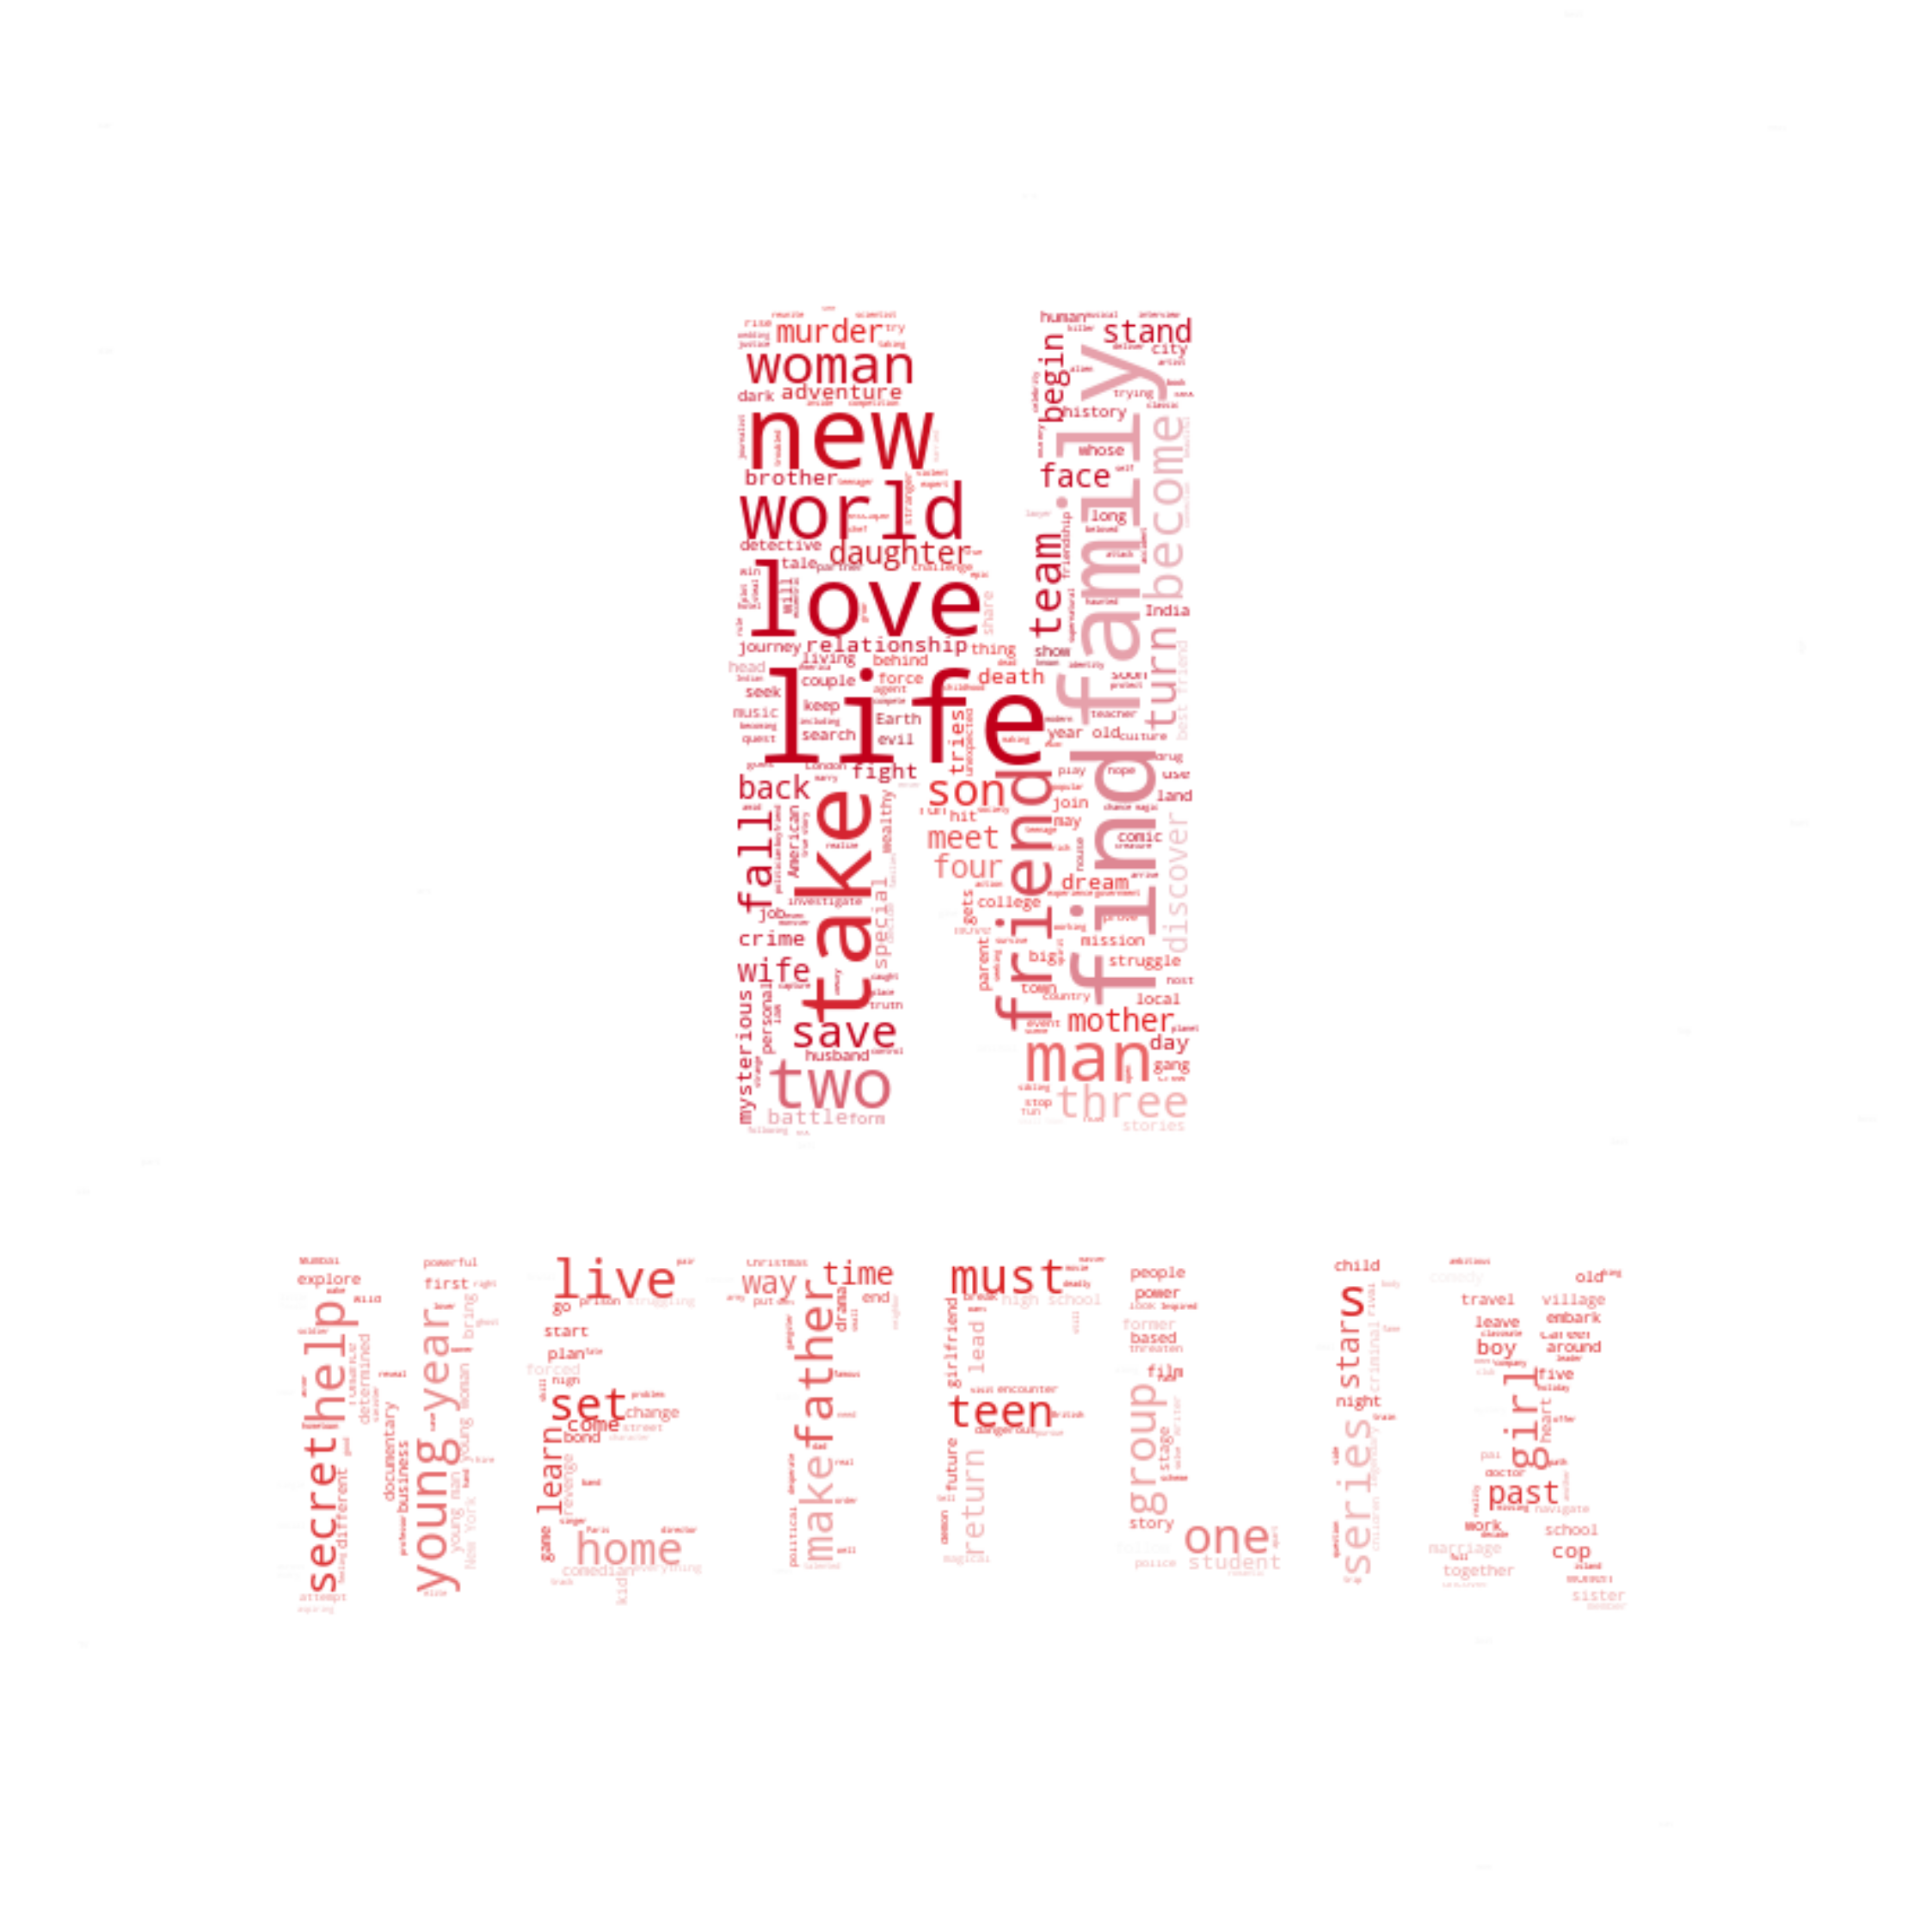

In [125]:
from PIL import Image

mask = np.array(Image.open('netflix_1.png'))
wordcloud_image = WordCloud(background_color="white", mode="RGBA", max_words=2000, mask=mask, width=5200, height=3600).generate(all_descriptions)

image_generator = ImageColorGenerator(mask)
plt.figure(figsize=[40,50])
plt.axis("off")
plt.imshow(wordcloud_image.recolor(color_func=image_generator), interpolation="bilinear")

In [35]:
netflix_df_copy.head()

show_id     type                        title  \
pd_date                                                    
2008-01-01   s7114    Movie         To and From New York   
2008-02-04   s1766  TV Show              Dinner for Five   
2009-05-05   s3249    Movie      Just Another Love Story   
2009-11-18   s5766    Movie                     Splatter   
2010-11-01   s3841    Movie  Mad Ron's Prevues from Hell   

                        director  \
pd_date                            
2008-01-01  Sorin Dan Mihalcescu   
2008-02-04                   NaN   
2009-05-05          Ole Bornedal   
2009-11-18             Joe Dante   
2010-11-01            Jim Monaco   

                                                         cast        country  \
pd_date                                                                        
2008-01-01  Barbara King, Shaana Diya, John Krisiukenas, Y...  United States   
2008-02-04                                                NaN  United States   
2009-05-05  Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...        Denmark   
2009-11-18  Corey Feldman, Tony Todd, Tara Leigh, Erin Way...  United States   
2010-11-01  Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...  United States   

                   date_added  release_year rating  duration  \
pd_date                                                        
2008-01-01    January 1, 2008          2006  TV-MA    81 min   
2008-02-04   February 4, 2008          2007  TV-MA  1 Season   
2009-05-05        May 5, 2009          2007  TV-MA   104 min   
2009-11-18  November 18, 2009          2009  TV-MA    29 min   
2010-11-01   November 1, 2010          1987     NR    84 min   

                                        listed_in  \
pd_date                                             
2008-01-01  Dramas, Independent Movies, Thrillers   
2008-02-04           Stand-Up Comedy & Talk Shows   
2009-05-05           Dramas, International Movies   
2009-11-18                          Horror Movies   
2010-11-01             Cult Movies, Horror Movies   

                                                  description added_month  \
pd_date                                                                     
2008-01-01  While covering a story in New York City, a Sea...           1   
2008-02-04  In each episode, four celebrities join host Jo...           2   
2009-05-05  When he causes a car accident that leaves a yo...           5   
2009-11-18  After committing suicide, a washed-up rocker r...          11   
2010-11-01  This collection cherry-picks trailers, forgott...          11   

            date_year date_month  one  
pd_date                                
2008-01-01     2008.0    January    1  
2008-02-04     2008.0   February    1  
2009-05-05     2009.0        May    1  
2009-11-18     2009.0   November    1  
2010-11-01     2010.0   November    1

In [77]:
netflix_df['one'].astype(int)

netflix_pivot_year = pd.pivot_table(
netflix_df_copy,
values = 'show_id', index='type', columns='date_year', aggfunc='count', fill_value=0)
netflix_pivot_year.head()
#netflix_pivot_year.dtypes 

date_year  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                          
Movie         1     2     1    13     3     6    19    58   258   864  1255   
TV Show       1     0     0     0     0     5     6    30   185   361   430   

date_year  2019  2020  2021  
type                         
Movie      1497  1312    88  
TV Show     656   697    29

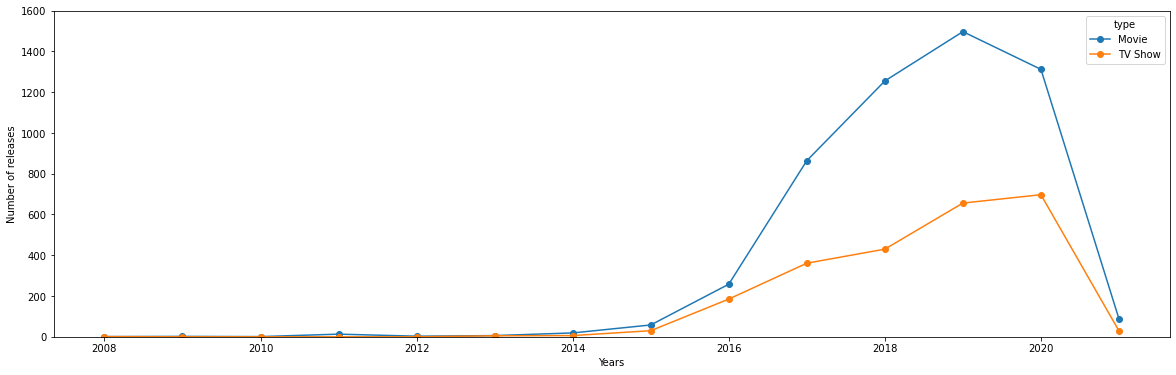

In [78]:
ax = netflix_pivot_year.T.plot(kind="line", ylim=(0, 1600), marker='o')
#ax.ylim  = (0, 5000)
fig = ax.get_figure()
fig.set_size_inches(20, 6)
locs, labels = plt.xticks()

#plt.xticks( np.arange(4), ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December') )
ax.set_xlabel("Years")
ax.set_ylabel("Number of releases")

plt.show()

country  Argentina  Argentina, Brazil, France, Poland, Germany, Denmark  \
show_id         50                                                  1     

country  Argentina, Chile  Argentina, Chile, Peru  Argentina, France  \
show_id                 1                       1                  1   

country  Argentina, France, United States, Germany, Qatar  Argentina, Italy  \
show_id                                                 1                 1   

country  Argentina, Spain  Argentina, United States  \
show_id                 8                         1   

country  Argentina, United States, Mexico  ...  \
show_id                                 1  ...   

country  Uruguay, Argentina, Germany, Spain  Uruguay, Argentina, Spain  \
show_id                                   1                          1   

country  Uruguay, Germany  Uruguay, Guatemala  Uruguay, Spain, Mexico  \
show_id                 1                   1                       1   

country  Venezuela  Venezuela, Colombia  Vietnam  West Germany  Zimbabwe  
show_id          1                    1        5             1         1  

[1 rows x 681 columns]

In [6]:
country_one_hot_df=netflix_df_copy[["country"]]
country_one_hot_df.reset_index(drop=True, inplace=True)
country_one_hot_df = pd.concat([country_one_hot_df.drop('country', 1), country_one_hot_df['country'].str.get_dummies(sep=",")], 1)
country_one_hot_df

incercare = pd.DataFrame(np.sum(country_one_hot_df.values, axis=0), columns=['sum'])
country_count_df = country_one_hot_df.agg(['sum'])
bla_df = pd.DataFrame()
bla_df = bla_df.append(country_count_df, ignore_index=True, )
bla_df.reset_index(drop=True, inplace=True)
print(bla_df.T)
columns = bla_df.columns
columns = bla_df.columns
columns_no_space = []
for column in columns:
    if column[0] == ' ':
        column = column[1:]
    
    columns_no_space.append(column)

final_df = pd.DataFrame(columns_no_space, columns =['country'])
final_df['count'] = bla_df.T.values
print(final_df)


               0
 Afghanistan   1
 Albania       1
 Algeria       2
 Angola        1
 Argentina    14
...           ..
Uruguay        9
Venezuela      2
Vietnam        5
West Germany   1
Zimbabwe       1

[187 rows x 1 columns]
          country  count
0     Afghanistan      1
1         Albania      1
2         Algeria      2
3          Angola      1
4       Argentina     14
..            ...    ...
182       Uruguay      9
183     Venezuela      2
184       Vietnam      5
185  West Germany      1
186      Zimbabwe      1

[187 rows x 2 columns]


In [7]:
import plotly.express as px

fig = px.treemap(final_df, 
                 path=['country'], 
                 values='count',
                )
fig.show()